In [80]:
import pandas as pd
import numpy as np

factors_excess_returns_with_dates = pd.read_excel('momentum_data.xlsx', sheet_name='factors (excess returns)')
momentum_excess_returns_with_dates = pd.read_excel('momentum_data.xlsx', sheet_name='momentum (excess returns)')
deciles_total_returns_with_dates = pd.read_excel('momentum_data.xlsx', sheet_name='deciles (total returns)')
size_sorts_total_returns_with_dates = pd.read_excel('momentum_data.xlsx', sheet_name='size_sorts (total returns)')
risk_free_rate_with_dates = pd.read_excel('momentum_data.xlsx', sheet_name='risk-free rate')

factors_excess_returns = factors_excess_returns_with_dates.set_index('Date')
momentum_excess_returns = momentum_excess_returns_with_dates.set_index('Date')
deciles_total_returns = deciles_total_returns_with_dates.set_index('Date')
size_sorts_total_returns = size_sorts_total_returns_with_dates.set_index('Date')
risk_free_rate = risk_free_rate_with_dates.set_index('Date')

# Question 2

* part 1

In [81]:
def performance_summary(df):
    annualized_mean = df.mean() * 12
    annualized_std = df.std() * np.sqrt(12)
    annualized_sharpe = (df.mean() / df.std()) * np.sqrt(12)
    skewness = df.skew()
    
    corr_to_rv = df.corr(factors_excess_returns['HML'])
    corr_to_rm = df.corr(factors_excess_returns['MKT'])

    return annualized_mean, annualized_std, annualized_sharpe, skewness, corr_to_rv, corr_to_rm 


In [82]:
first_subsample = performance_summary(momentum_excess_returns['UMD'])
second_subsample = performance_summary(momentum_excess_returns[:'1993']['UMD'])
third_subsample = performance_summary(momentum_excess_returns['1994':'2008']['UMD'])
fourth_subsample = performance_summary(momentum_excess_returns['2009':'2024']['UMD'])

In [83]:
pd.DataFrame({'Subsample':['1927-2004','1927-1993','1994-2008','2009-2024'], 'mean':[first_subsample[0], second_subsample[0], third_subsample[0], fourth_subsample[0]], 'vol':[first_subsample[1], second_subsample[1], third_subsample[1], fourth_subsample[1]], 'sharpe':[first_subsample[2], second_subsample[2], third_subsample[2], fourth_subsample[2]], 'skewness': [first_subsample[3], second_subsample[3], third_subsample[3], fourth_subsample[3]], 'corr to r^m': [first_subsample[4], second_subsample[4], third_subsample[4], fourth_subsample[4]], 'corr to r^v':[first_subsample[5], second_subsample[5], third_subsample[5], fourth_subsample[5]]}).set_index('Subsample')

,mean,vol,sharpe,skewness,corr to r^m,corr to r^v
Subsample,,,,,,
1927-2004,0.075328,0.162508,0.463534,-2.990493,-0.406410,-0.344284
1927-1993,0.090081,0.160003,0.562992,-3.808207,-0.495002,-0.362496
1994-2008,0.104373,0.175551,0.594548,-0.582038,-0.129361,-0.234519
2009-2024,-0.015092,0.158467,-0.095238,-2.691022,-0.320924,-0.367588


Statistics in the first three subsamples have been similar, but the sharpe ratio has decreased significantly in the last subsample.

Momentum can very well be an important part of the portfolio with near 0 returns due to the fact that it has negative correlation with r^m and with r^v, so it can serve as a very good hedge for a portfolio.

* Part 2

In [84]:
r_mom_uff = 0.5 * (size_sorts_total_returns['BIG HiPRIOR'] + size_sorts_total_returns['SMALL HiPRIOR']) - risk_free_rate['RF']
r_mom_u = (1/3) * (deciles_total_returns['PRIOR 8'] + deciles_total_returns['PRIOR 9'] + deciles_total_returns['Hi PRIOR']) - risk_free_rate['RF']

In [85]:
table2_subsample_1 = performance_summary(momentum_excess_returns['1994':]['UMD'])
table2_subsample_2 = performance_summary(r_mom_uff['1994':])

In [86]:
table_2_df = pd.DataFrame({'1994-2024':['Long-and-Short', 'Long-Only'], 'mean':[table2_subsample_1[0], table2_subsample_2[0]], 'vol':[table2_subsample_1[1], table2_subsample_2[1]], 'sharpe':[table2_subsample_1[2], table2_subsample_2[2]], 'skewness': [table2_subsample_1[3], table2_subsample_2[3]], 'corr to r^m': [table2_subsample_1[4], table2_subsample_2[4]], 'corr to r^v':[table2_subsample_1[5], table2_subsample_2[5]]}).set_index('1994-2024')
table_2_df

,mean,vol,sharpe,skewness,corr to r^m,corr to r^v
1994-2024,,,,,,
Long-and-Short,0.043184,0.167682,0.257534,-1.445951,-0.215225,-0.306180
Long-Only,0.117195,0.178410,0.656885,-0.444802,-0.118954,0.903581


Yes, the mean is higher, the volatility is slightly higher, and the sharpe ratio is much higher. So, with respect to only mean, volatility, and the Sharpe Ratio, the long-only portfolio is just as attractive as the long-and-short portfolio.

No, it is not as diversifying. It is highly correlated with the value factor.

In [87]:
cumprod_r_mom_uff = (1+r_mom_uff['1994':]).cumprod()
cumprod_momentum_excess_returns = (1+momentum_excess_returns['1994':]['UMD']).cumprod()

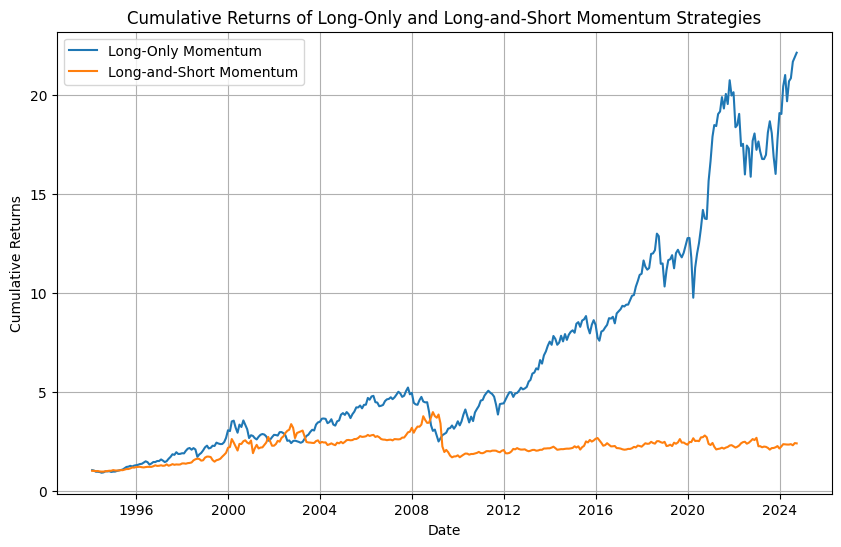

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumprod_r_mom_uff.index, cumprod_r_mom_uff, label="Long-Only Momentum")
plt.plot(cumprod_momentum_excess_returns.index, cumprod_momentum_excess_returns, label="Long-and-Short Momentum")

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Long-Only and Long-and-Short Momentum Strategies")
plt.legend()
plt.grid(True)
plt.show()

* Part 3

In [89]:
r_mom_d1 = deciles_total_returns['Hi PRIOR'] - deciles_total_returns['Lo PRIOR']
r_mom_d3 = ((1/3) * (deciles_total_returns['PRIOR 8'] + deciles_total_returns['PRIOR 9'] + deciles_total_returns['Hi PRIOR'])) - ((1/3) * (deciles_total_returns['Lo PRIOR'] + deciles_total_returns['PRIOR 2'] + deciles_total_returns['PRIOR 3']))
r_mom_d5 = ((1/5) * (deciles_total_returns['PRIOR 6'] + deciles_total_returns['PRIOR 7'] + deciles_total_returns['PRIOR 8'] + deciles_total_returns['PRIOR 9'] + deciles_total_returns['Hi PRIOR'])) - ((1/5) * (deciles_total_returns['Lo PRIOR'] + deciles_total_returns['PRIOR 2'] + deciles_total_returns['PRIOR 3'] + deciles_total_returns['PRIOR 4'] + deciles_total_returns['PRIOR 5']))

In [90]:
table3_subsample_1 = performance_summary(r_mom_d1['1994':])
table3_subsample_2 = performance_summary(r_mom_d3['1994':])
table3_subsample_3 = performance_summary(r_mom_d5['1994':])

In [91]:
pd.DataFrame({'1994-2024':['R_mom_d1','R_mom_d3','R_mom_d5'], 'mean':[table3_subsample_1[0], table3_subsample_2[0], table3_subsample_3[0]], 'vol':[table3_subsample_1[1], table3_subsample_2[1], table3_subsample_3[1]], 'sharpe':[table3_subsample_1[2], table3_subsample_2[2], table3_subsample_3[2]], 'skewness': [table3_subsample_1[3], table3_subsample_2[3], table3_subsample_3[3]], 'corr to r^m': [table3_subsample_1[4], table3_subsample_2[4], table3_subsample_3[4]], 'corr to r^v':[table3_subsample_1[5], table3_subsample_2[5], table3_subsample_3[5]]}).set_index('1994-2024')

,mean,vol,sharpe,skewness,corr to r^m,corr to r^v
1994-2024,,,,,,
R_mom_d1,0.082010,0.299035,0.274248,-1.304629,-0.233463,-0.319715
R_mom_d3,0.028551,0.193383,0.147638,-1.345002,-0.211472,-0.361659
R_mom_d5,0.016411,0.133990,0.122480,-1.415925,-0.212234,-0.348584


Yes, they do line up. The 5-decile construction has the lowest sharpe ratio out of the three, but it is made up for the fact that less of the portfolio will have to be adjusted on a monthly basis, meaning that transaction costs will be lower with the strategy. 

It should consider using a 5-decile construction. Using a 1-decile construction, despite the higher sharpe ratio, it would lead to much higher transaction costs, which comes from adjusting a larger portion of the portfolio every month. 

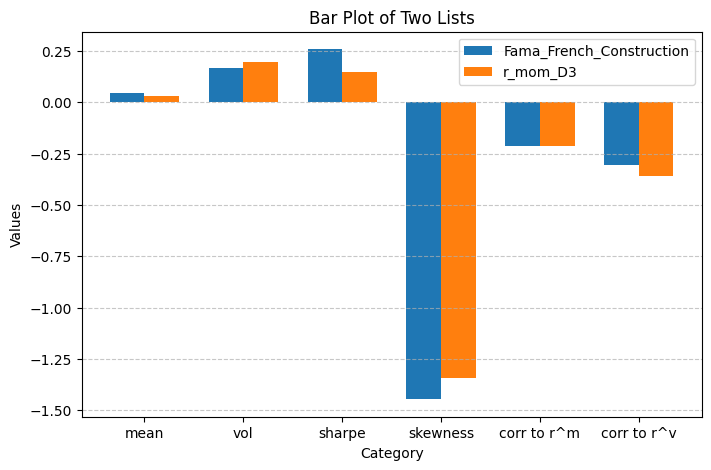

In [93]:
x = np.arange(len(table2_subsample_1)) 
width = 0.35  

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, table2_subsample_1, width, label='Fama_French_Construction')
plt.bar(x + width/2, table3_subsample_2, width, label='r_mom_D3')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot of Two Lists')
plt.xticks(x, [f"{i}" for i in table_2_df.columns])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Yes, the two constructions are very similar.

* Part 4

In [95]:
r_mom_s = size_sorts_total_returns['SMALL HiPRIOR'] - size_sorts_total_returns['SMALL LoPRIOR']
r_mom_b = size_sorts_total_returns['BIG HiPRIOR'] - size_sorts_total_returns['BIG LoPRIOR']
r_mom_ff = momentum_excess_returns['1994':]['UMD']

In [96]:
table_four_row_1 = performance_summary(r_mom_ff)
table_four_row_2 = performance_summary(r_mom_s['1994':])
table_four_row_3 = performance_summary(r_mom_b['1994':])

In [97]:
pd.DataFrame({'1994-2024':['r_mom_ff','r_mom_s','r_mom_b'], 'mean':[table_four_row_1[0], table_four_row_2[0], table_four_row_3[0]], 'vol':[table_four_row_1[1], table_four_row_2[1], table_four_row_3[1]], 'sharpe':[table_four_row_1[2], table_four_row_2[2], table_four_row_3[2]], 'skewness': [table_four_row_1[3], table_four_row_2[3], table_four_row_3[3]], 'corr to r^m': [table_four_row_1[4], table_four_row_2[4], table_four_row_3[4]]}).set_index('1994-2024')

,mean,vol,sharpe,skewness,corr to r^m
1994-2024,,,,,
r_mom_ff,0.043184,0.167682,0.257534,-1.445951,-0.215225
r_mom_s,0.063200,0.169633,0.372569,-1.763649,-0.148512
r_mom_b,0.023177,0.182458,0.127028,-0.879114,-0.257523


Yes, the momentum strategy with big stocks still delivers positive returns with comparable risk. The sharpe is less, but it appears to still be a viable strategy.

* Part 5

I believe that the AQR retail product accurately captures the important features originally given by the Fama-French construction of momentum. An interesting modification would be to see how many of the stocks that leave the 5-decile momentum level reenter it in the next period. If that is the case, one could find a means of keeping these stocks in the portfolio (and only then remove them after another month of sub-par momentum performance) in an attempt to lower transaction costs.

# Question 4

In [99]:
barnstable_data_with_dates = pd.read_excel('barnstable_analysis_data.xlsx', sheet_name = 'data')
barnstable_data = barnstable_data_with_dates.set_index('date')

In [100]:
def performance_summary_2(df):
    mean = df.mean() * 12
    std = df.std() * np.sqrt(12)

    log_mean = np.log(1+df).mean()
    log_std = np.log(1+df).std()

    return mean, std, log_mean, log_std

In [102]:
rm_subsample_1 = performance_summary(barnstable_data['SPX']['1965':'1999'])
rm_subsample_2 = performance_summary(barnstable_data['SPX']['2000':])
rm_subsample_3 = performance_summary(barnstable_data['SPX'])

rm_hat_subsample_1 = performance_summary(barnstable_data['TB1M']['1965':'1999'])
rm_hat_subsample_2 = performance_summary(barnstable_data['TB1M']['2000':])
rm_hat_subsample_3 = performance_summary(barnstable_data['TB1M'])

mkt_subsample_1 = performance_summary(factors_excess_returns['MKT']['1965':'1999'])
mkt_subsample_2 = performance_summary(factors_excess_returns['MKT']['2000':])
mkt_subsample_3 = performance_summary(factors_excess_returns['MKT'])

In [104]:
pd.DataFrame({'Asset Returns':['rm levels','rm_hat levels','rf levels', 'rm log', 'rm_hat log','rf log'],'1965-1999 mean':[rm_subsample_1[0], rm_hat_subsample_1[0], mkt_subsample_1[0], rm_subsample_1[2], rm_hat_subsample_1[2], mkt_subsample_1[2]], '1965-1999 vol': [rm_subsample_1[1], rm_hat_subsample_1[1], mkt_subsample_1[1], rm_subsample_1[3], rm_hat_subsample_1[3], mkt_subsample_1[3]], '2000-2024 mean': [rm_subsample_2[0], rm_hat_subsample_2[0], mkt_subsample_2[0], rm_subsample_2[2], rm_hat_subsample_2[2], mkt_subsample_2[2]], '2000-2024 vol': [rm_subsample_2[1], rm_hat_subsample_2[1], mkt_subsample_2[1], rm_subsample_2[3], rm_hat_subsample_2[3], mkt_subsample_2[3]], '1926-2024 mean': [rm_subsample_3[0], rm_hat_subsample_3[0], mkt_subsample_3[0], rm_subsample_3[2], rm_hat_subsample_3[2], mkt_subsample_3[2]], '1926-2024 vol': [rm_subsample_3[1], rm_hat_subsample_3[1], mkt_subsample_3[1], rm_subsample_3[3], rm_hat_subsample_3[3], mkt_subsample_3[3]]}).set_index('Asset Returns')

,1965-1999 mean,1965-1999 vol,2000-2024 mean,2000-2024 vol,1926-2024 mean,1926-2024 vol
Asset Returns,,,,,,
rm levels,0.129354,0.149405,0.087283,0.153055,0.115535,0.186777
rm_hat levels,0.061503,0.007179,0.017200,0.005533,0.031902,0.008516
rf levels,0.067286,0.155672,0.070461,0.158894,0.081959,0.185019
rm log,0.865795,-0.349411,0.570273,-0.483852,0.618571,0.320120
rm_hat log,8.567067,1.419082,3.108591,0.882392,3.745944,1.099154
rf log,0.432228,-0.493638,0.443444,-0.494480,0.442977,0.154953


The full-sample returns have higher mean returns than the 2000-2024 sub-sample, but tend to have lower returns than the 1965-1999 sub-sample. Across the full sample and the sub-sample, the volatility is very similar

The log stats scale the level stats larger across both mean and vol.

* Part 2